In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import keras 
from keras.layers import Dense,Embedding,Dropout,LSTM,Activation
from keras.metrics import binary_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [3]:
data = pd.read_csv('spam.csv')
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
le = LabelEncoder()
data['Label'] = le.fit_transform(data['Label'])

In [5]:
data.head()

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
y = data['Label'].values

In [7]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
x = data['EmailText']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ã_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: EmailText, Length: 5572, dtype: object

In [9]:
import nltk
import re
from nltk.corpus import stopwords

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sai
[nltk_data]     kasyap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
x[1]

'Ok lar... Joking wif u oni...'

In [11]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(x)):
    rev = re.sub('[^a-zA-Z]',' ',x[i])
    rev = rev.lower()
    rev = rev.split(' ')
    rev = [ps.stem(word) for word in rev if not word in stopwords.words('english')]
    rev = ' '.join(rev)
    corpus.append(rev)

In [12]:
corpus

['go jurong point  crazi   avail bugi n great world la e buffet    cine got amor wat   ',
 'ok lar    joke wif u oni   ',
 'free entri   wkli comp win fa cup final tkt   st may       text fa       receiv entri question std txt rate c appli             ',
 'u dun say earli hor    u c alreadi say   ',
 'nah think goe usf  live around though',
 'freemsg hey darl   week word back  like fun still  tb ok  xxx std chg send           rcv',
 'even brother like speak  treat like aid patent ',
 'per request  mell mell  oru minnaminungint nurungu vettam   set callertun caller  press    copi friend callertun',
 'winner   valu network custom select receivea         prize reward  claim call              claim code kl     valid    hour ',
 'mobil    month  u r entitl updat latest colour mobil camera free  call mobil updat co free            ',
 'gonna home soon want talk stuff anymor tonight  k  cri enough today ',
 'six chanc win cash             pound txt  csh   send        cost    p day   day      

In [13]:
one_hot_repr = [one_hot(line,6000) for line in corpus]

In [14]:
embedded_repr  = pad_sequences(one_hot_repr, padding='pre',maxlen=30)

In [15]:
embedded_repr

array([[   0,    0,    0, ..., 1054,  704, 4814],
       [   0,    0,    0, ..., 3132, 1754, 4333],
       [   0,    0,    0, ..., 2964, 2478, 3321],
       ...,
       [   0,    0,    0, ..., 1046, 5226, 5412],
       [   0,    0,    0, ..., 4819, 3685, 1807],
       [   0,    0,    0, ..., 5649, 1644, 2627]])

In [16]:
model = Sequential()
model.add(Embedding(6000,40,input_length=30))
model.add(LSTM(300))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
x_train,x_test,y_train,y_test = train_test_split(embedded_repr, y)

In [19]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),shuffle=True,verbose=2)

C:\Users\sai kasyap\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4179 samples, validate on 1393 samples
Epoch 1/10
 - 17s - loss: 0.4276 - accuracy: 0.8545 - val_loss: 0.2811 - val_accuracy: 0.8823
Epoch 2/10
 - 17s - loss: 0.2702 - accuracy: 0.8835 - val_loss: 0.2016 - val_accuracy: 0.9497
Epoch 3/10
 - 17s - loss: 0.1988 - accuracy: 0.9476 - val_loss: 0.1520 - val_accuracy: 0.9648
Epoch 4/10
 - 17s - loss: 0.1236 - accuracy: 0.9725 - val_loss: 0.1140 - val_accuracy: 0.9698
Epoch 5/10
 - 17s - loss: 0.0824 - accuracy: 0.9794 - val_loss: 0.0900 - val_accuracy: 0.9713
Epoch 6/10
 - 17s - loss: 0.0661 - accuracy: 0.9828 - val_loss: 0.0894 - val_accuracy: 0.9734
Epoch 7/10
 - 17s - loss: 0.0494 - accuracy: 0.9871 - val_loss: 0.1002 - val_accuracy: 0.9727
Epoch 8/10
 - 17s - loss: 0.0447 - accuracy: 0.9871 - val_loss: 0.0952 - val_accuracy: 0.9763
Epoch 9/10
 - 17s - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0853 - val_accuracy: 0.9756
Epoch 10/10
 - 17s - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0850 - val_accuracy: 0.9770


In [20]:
pred_cls = model.predict_classes(x_test, verbose=0)

In [21]:
accuracy_score(pred_cls, y_test)

0.9770279971284996

In [22]:
cm = confusion_matrix(pred_cls, y_test)
cm

array([[1216,   19],
       [  13,  145]], dtype=int64)

Text(87.0, 0.5, 'truth')

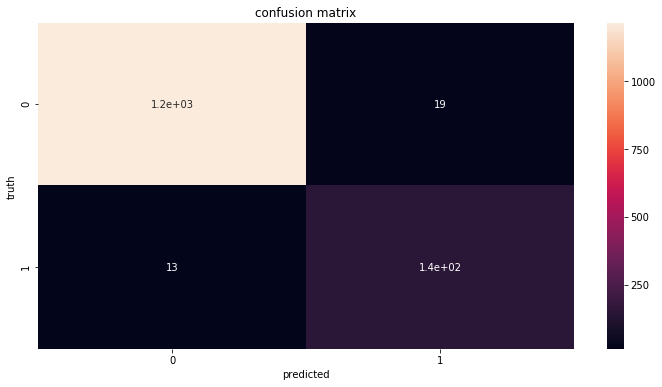

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('truth')

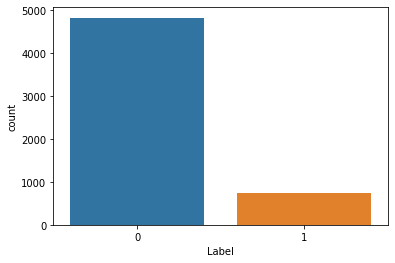

In [24]:
sns.countplot(x='Label',data=data)

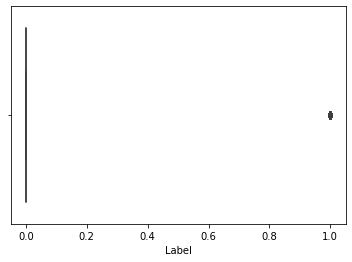

In [25]:
sns.boxplot(x=data['Label'])

<BarContainer object of 2 artists>

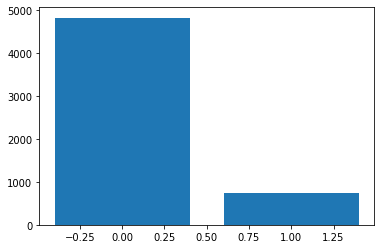

In [46]:
plt.bar(data['Label'].unique(),data.groupby('Label').agg('count')['EmailText'].values)

In [41]:
count = data.groupby('Label').agg('count')
count['EmailText'].values

array([4825,  747], dtype=int64)